## Content
### Columns
#### •	age: age of primary beneficiary 
#### •	sex: insurance contractor gender, female, male 
#### •	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
#### objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 
#### •	children: Number of children covered by health insurance / Number of dependents
#### •	smoker: Smoking
#### •	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
#### •	charges: Individual medical costs billed by health insurance


## Inspiration
### Can you accurately predict insurance costs?


In [1]:
# Importing Pandas

import pandas as pd

In [2]:
# Importing matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing dataset

df=pd.read_csv('datasets_13720_18513_insurance(1).csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Importing label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

## label encoding


In [5]:
# Performing Labelencoding on categorical features

df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)
df.region=le.fit_transform(df.region)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## anova

In [7]:
# Importing statsmodels.api for annoa testing

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
mod=ols('charges~region',data=df).fit()

In [9]:
aov=sm.stats.anova_lm(mod,type=2)
print(aov)

              df        sum_sq       mean_sq         F    PR(>F)
region       1.0  7.557128e+06  7.557128e+06  0.051494  0.820518
Residual  1336.0  1.960667e+11  1.467565e+08       NaN       NaN


## ttest

In [3]:
# Importing stats for ttest 

from scipy import stats

In [11]:
stats.ttest_ind(df.sex,df.charges)

Ttest_indResult(statistic=-40.08221541910007, pvalue=1.5707339997849575e-275)

In [12]:
stats.ttest_ind(df.smoker,df.charges)

Ttest_indResult(statistic=-40.08312294525875, pvalue=1.5354226097474645e-275)

In [13]:
# Correlation for categorical as well with respect to target

df.corr().charges

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

## Outliers in the dataset plotted through Box-plot

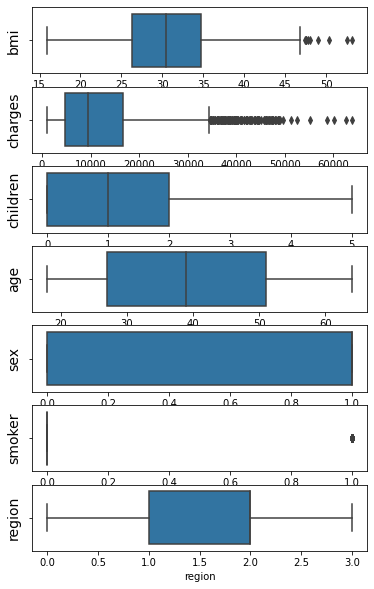

In [14]:
box=df[['bmi', 'charges','children','age','sex','smoker','region']]
plt.figure(figsize=(6,10), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=7:     # as there are 7 columns in the data
        ax = plt.subplot(7,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.ylabel(column,fontsize=14) #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Removing outliers

### IQR method used

In [15]:
Q1=df.bmi.quantile(0.25)
Q3=df.bmi.quantile(0.75)
print(Q1)
print(Q3)

26.29625
34.69375


In [16]:
IQR=Q3-Q1
IQR

8.3975

In [17]:
L=Q1-1.5*IQR
H=Q3+1.5*IQR
L,H

(13.7, 47.290000000000006)

In [18]:
df[(df.bmi<L)|(df.bmi>H)]

,age,sex,bmi,children,smoker,region,charges
116,58,1,49.06,0,0,2,11381.32540
286,46,0,48.07,2,0,0,9432.92530
401,47,1,47.52,1,0,2,8083.91980
543,54,0,47.41,0,1,2,63770.42801
847,23,1,50.38,1,0,2,2438.05520
860,37,0,47.60,2,1,3,46113.51100
1047,22,1,52.58,1,1,2,44501.39820
1088,52,1,47.74,1,0,2,9748.91060
1317,18,1,53.13,0,0,2,1163.46270


In [19]:
df=df[(df.bmi>L)&(df.bmi<H)]
df.shape

(1329, 7)

C:\Users\athir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

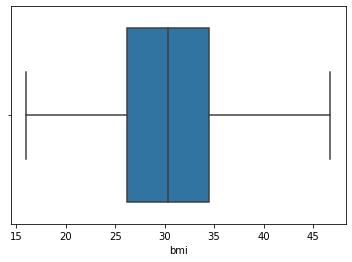

In [20]:
# Outliers of bmi removed

sns.boxplot(df.bmi)

In [21]:
df.corr().charges

age         0.302022
sex         0.063394
bmi         0.193196
children    0.069739
smoker      0.785912
region     -0.010730
charges     1.000000
Name: charges, dtype: float64

# Normality check

C:\Users\athir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\athir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\athir\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

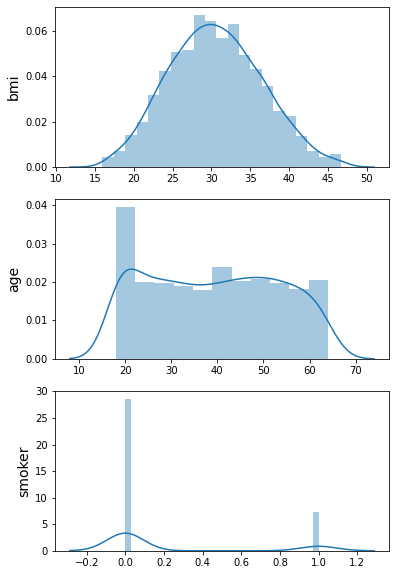

In [22]:
distplot=df[['bmi', 'age','smoker','sex','children','region']]
plt.figure(figsize=(6,10), facecolor='white')
plotnumber = 1

for column in distplot:
    if plotnumber<=7:     # as there are 7 columns in the data
        ax = plt.subplot(7,1,plotnumber)
        sns.distplot(x=distplot[column])
        plt.ylabel(column,fontsize=14)#plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

## Skewness and Kurtosis

In [23]:
import numpy as np
from scipy import stats

In [24]:
print('sk of age',stats.skew(df.age))
print('kr of age',stats.kurtosis(df.age))

sk of age 0.05834735182137375
kr of age -1.2428133331123858


In [25]:
print('sk of bmi',stats.skew(df.bmi))
print('kr of bmi',stats.kurtosis(df.bmi))

sk of bmi 0.15700217319518073
kr of bmi -0.3685240032833912


In [26]:
print('sk of smoker',stats.skew(df.smoker))
print('kr of smoker',stats.kurtosis(df.smoker))

sk of smoker 1.469762806675687
kr of smoker 0.16020270788719282


## Linear Regression

In [27]:
# X is the input column and y is output column

X=df.loc[:,['age','bmi','smoker']]
y=df.charges

In [28]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=13)

In [29]:
# Defining,training and predicting the model
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)

LinearRegression()

In [31]:
#r2_score

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(y_test,y_predict)

0.7921581125278097

In [32]:
# Prediction for values

model.predict([[19,27.900,1]])

array([26122.93042273])

In [33]:
# Mean absolute error
mean_absolute_error(y_test,y_predict)

3960.192578947072

In [34]:
# Mean squared error
mean_squared_error(y_test,y_predict)

29931945.392363973

## Random forest
### This algorithm gave the best accuracy for this dataset

In [35]:
# Importing dataset

df1=pd.read_csv('datasets_13720_18513_insurance(1).csv')
df1.shape

(1338, 7)

In [36]:
#Label encoding applied 

df1.sex=le.fit_transform(df1.sex)
df1.smoker=le.fit_transform(df1.smoker)
df1.region=le.fit_transform(df1.region)

In [37]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [38]:
# X is the input column and y is output column


X1=df1.iloc[:,:-1]
y1=df1.charges

<AxesSubplot:>

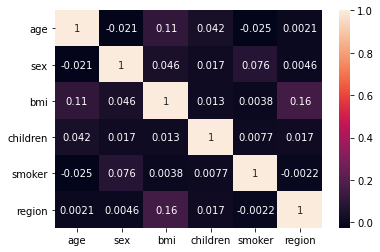

In [39]:
# Heat-map for checking correlation

sns.heatmap(X1.corr(),annot=True)

In [40]:
# Train Test Split

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.2,random_state=13)

In [41]:
# Defining,training and predicting the model
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=27,n_estimators=57,max_depth=4)
model.fit(X1_train,y1_train)
y_predict=model.predict(X1_test)

RandomForestRegressor(max_depth=4, n_estimators=57, random_state=27)

In [43]:
# r2_score
r2_score(y1_test,y_predict)

0.9249469288748824

In [44]:
# Prediction for values
model.predict([[19,0,27.900,0,1,3]])

array([18408.85996414])

In [45]:
# Mean absolute error
mean_absolute_error(y1_test,y_predict)

2045.8876670802745

In [46]:
# Mean squared error
mean_squared_error(y1_test,y_predict)

10667891.97555856

## Hyperparameter Tuning

In [47]:
n_estimators=[8,9,13,16,19,22,25,27,31,34,37,43,46,48,53,57,61,66]
max_depth=[2,3,4,5,6]
random_state=[7,8,10,13,15,19,22,24,26,27,30,70,60,57]

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'random_state':random_state
}
clf=GridSearchCV(RandomForestRegressor(),param_grid)
clf.fit(X1_train,y1_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [8, 9, 13, 16, 19, 22, 25, 27, 31, 34,
                                          37, 43, 46, 48, 53, 57, 61, 66],
                         'random_state': [7, 8, 10, 13, 15, 19, 22, 24, 26, 27,
                                          30, 70, 60, 57]})

In [50]:
clf.best_params_

{'max_depth': 4, 'n_estimators': 37, 'random_state': 10}

In [51]:
model= RandomForestRegressor(random_state=10,n_estimators=37,max_depth=4)
model.fit(X1_train,y1_train)

RandomForestRegressor(max_depth=4, n_estimators=37, random_state=10)

In [52]:
y_predict=model.predict(X1_test)

In [53]:
r2_score(y1_test,y_predict)

0.9227246976103003

In [54]:
model.predict([[19,0,27.900,0,1,3]])

array([18337.11233258])

In [55]:
mean_absolute_error(y1_test,y_predict)

2090.0727640588466

In [56]:
mean_squared_error(y1_test,y_predict)

10983755.44016949

## XGBoost

In [57]:
# Importing Packages
from xgboost import XGBRegressor
model=XGBRegressor()

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [59]:
# X is the input column and y is output column
X2=df.iloc[:,:-1]
y2=df.charges

In [60]:
# Train Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=19)

In [61]:
# Defining,training and predicting the model

model = XGBRegressor(random_state=24,max_depth=4,n_estimators=26,learning_rate=0.1)

In [62]:
model.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=26, n_jobs=8, num_parallel_tree=1, random_state=24,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y2_predict = model.predict(X2_test)

C:\Users\athir\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [64]:
# r2_score

r2_score(y2_test,y2_predict)

0.9201867420952292

In [65]:
# Prediction for values
model.predict(pd.DataFrame([[19,0,27.900,0,1,3]],columns=['age','sex','bmi','children','smoker','region']))

array([16936.201], dtype=float32)

In [66]:
# Mean absolute error
mean_absolute_error(y2_test,y2_predict)

1851.741874753583

In [ ]:
# Mean squared error
mean_squared_error(y1_test,y_predict)

## Decision tree

In [67]:
# Importing packages

%matplotlib inline
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [69]:
# X is the input column and y is output column

X3=df.iloc[:,:-1]
y3=df.charges

In [70]:
# Train Test Split
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.10,random_state=100)

In [71]:
# Defining,training and predicting the model
model = DecisionTreeRegressor(max_depth=4,random_state=50)
model.fit(X3_train,y3_train)
y_predict = model.predict(X3_test)
r2_score(y3_test,y_predict)

0.900477368714826

In [72]:
# Mean absolute error
mean_absolute_error(y3_test,y_predict)

2499.309671385141

In [74]:
# Mean squared error
mean_squared_error(y3_test,y_predict)

16945817.76941662

In [2]:
df.count()

NameError: name 'df' is not defined

In [76]:
# adjusted r2_square

adjusted_r2 = 1-(1-0.90)*(1329-1)/(1329-6-1)    # Here N is the number of rows in dataset and p is the input feature that we are giving
adjusted_r2



0.758910741301059

In [77]:
X3.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [78]:
# Prediction for values
model.predict([[19,0,27.900,0,1,3]])

array([17584.24587756])

### Visualization of tree

In [79]:
# Importing the packages

from sklearn import tree
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [80]:
rcParams['figure.figsize'] =50,30     # To increase the figure size

[Text(1395.0, 1494.8999999999999, 'smoker <= 0.5\nmse = 143825379.695\nsamples = 1329\nvalue = 13212.333'),
 Text(697.5, 1223.1, 'age <= 42.5\nmse = 36000286.674\nsamples = 1058\nvalue = 8442.167'),
 Text(348.75, 951.3, 'children <= 0.5\nmse = 22174667.245\nsamples = 594\nvalue = 5410.964'),
 Text(174.375, 679.4999999999999, 'age <= 32.5\nmse = 16975421.342\nsamples = 252\nvalue = 3861.505'),
 Text(87.1875, 407.6999999999998, 'age <= 22.5\nmse = 15455856.953\nsamples = 206\nvalue = 3279.771'),
 Text(43.59375, 135.89999999999986, '\n  (...)  \n'),
 Text(130.78125, 135.89999999999986, '\n  (...)  \n'),
 Text(261.5625, 407.6999999999998, 'bmi <= 23.132\nmse = 15478063.204\nsamples = 46\nvalue = 6466.664'),
 Text(217.96875, 135.89999999999986, '\n  (...)  \n'),
 Text(305.15625, 135.89999999999986, '\n  (...)  \n'),
 Text(523.125, 679.4999999999999, 'region <= 0.5\nmse = 22933169.072\nsamples = 342\nvalue = 6552.671'),
 Text(435.9375, 407.6999999999998, 'age <= 22.5\nmse = 35177584.054\nsam

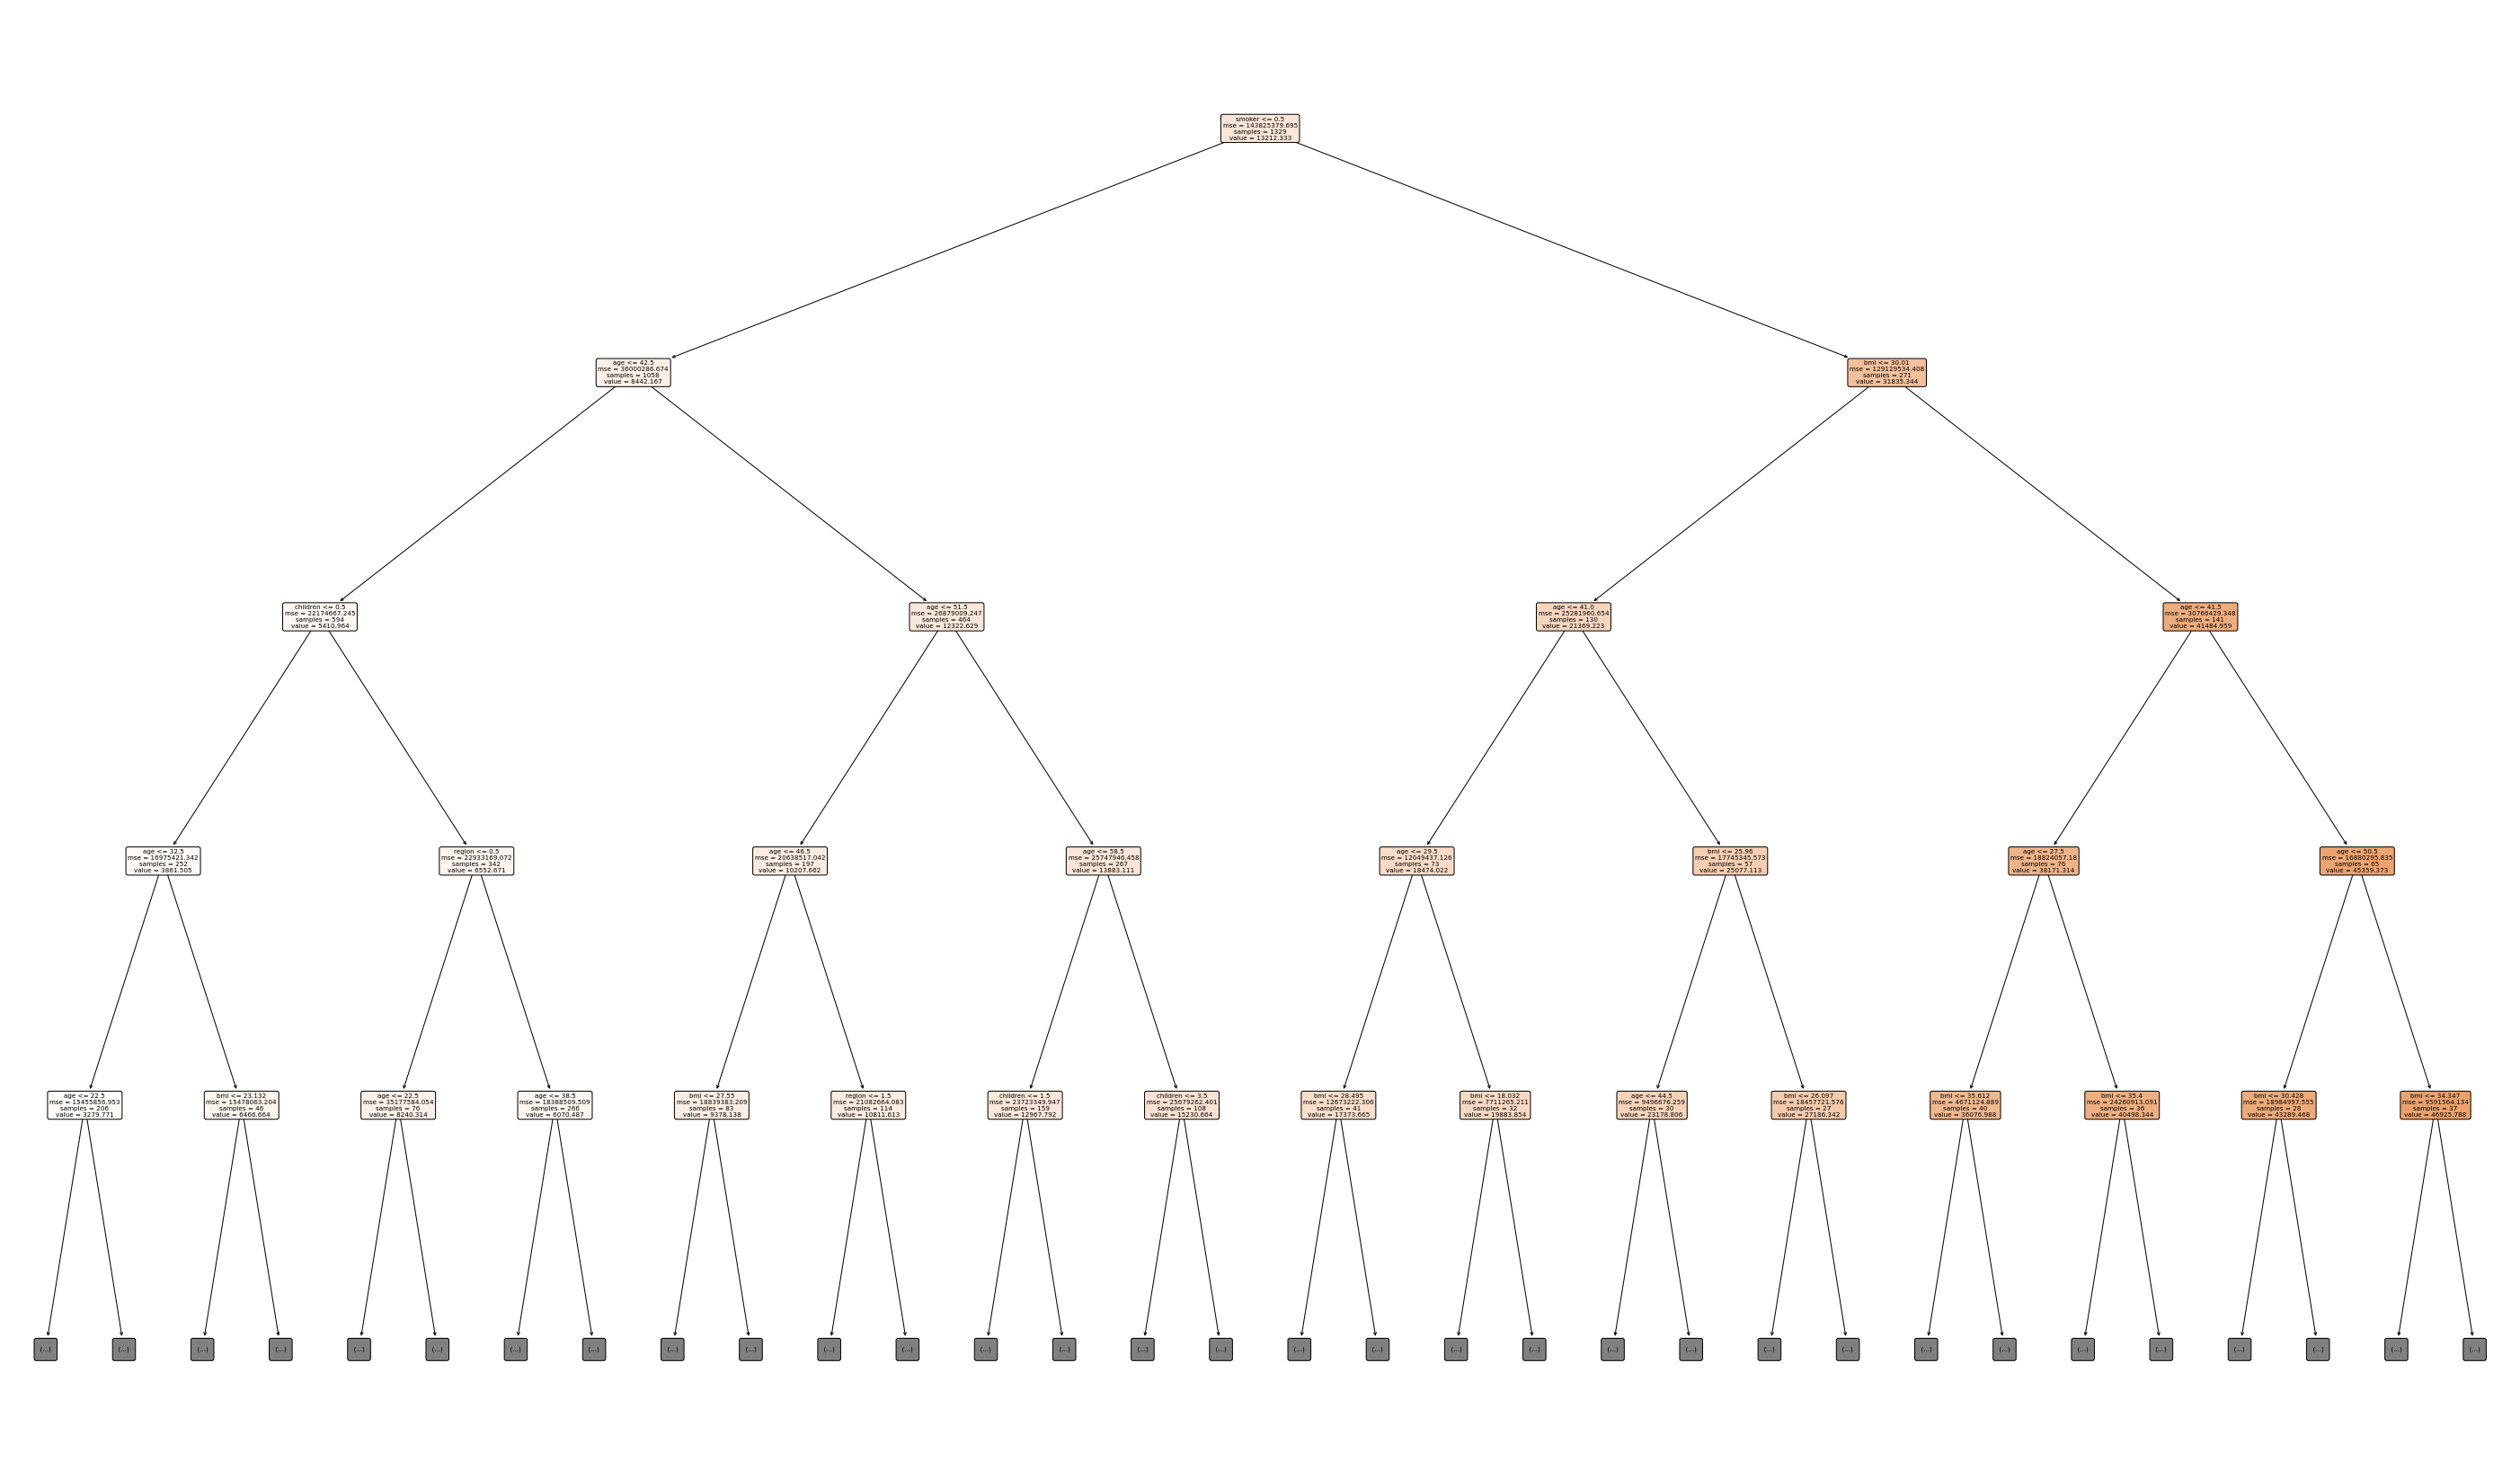

In [82]:
import warnings
warnings.filterwarnings('ignore')


dt = DecisionTreeRegressor()

dt.fit(X3,y3)

tree.plot_tree(dt,class_names=['charges'],   # Contains the target or output column
               feature_names=['age','sex','bmi','children','smoker','region'],  # Contains the features or labels or input columns
                filled=True,    # For the colors in nodes
                  rounded=True,  # For rounded boxes
                   max_depth=4   # without ternimal nodes or leaves we need to count max_depth here its 4


)

## Hyperparameter Tuning

In [84]:
# Importing GridSearchCV, RandomizedSearchCV packages

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'max_depth':[1,2,3,4,5],
              'random_state':[10,20,30,40,100],
               'min_samples_split':[1,2,3],
              'min_samples_leaf':[1,2]
              
              # This is the number of trees you want to build before taking the maximum voting 
             }  # dictionary of parameters.  5x5x6 = 150.

grid = GridSearchCV(model,parameters,cv=10,verbose=1) # Verbose means verbal description that explains the output
#grid = RandomizedSearchCV(model,parameters,cv=5)
grid.fit(X3,y3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   12.0s finished


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=4, random_state=50),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'random_state': [10, 20, 30, 40, 100]},
             verbose=1)

In [85]:
grid.best_score_

0.8480286464973761

In [86]:
grid.best_params_

{'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 10}

In [88]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {'max_depth':[1,2,3,4,5],
              'random_state':[10,20,30,40,100],
               'min_samples_split':[1,2,3],
              'min_samples_leaf':[1,2]
              
              # This is the number of trees you want to build before taking the maximum voting 
             }  # dictionary of parameters.  5x5x6 = 150.

#grid = GridSearchCV(model,parameters,cv=10,verbose=1) # Verbose means verbal description that explains the output
grid = RandomizedSearchCV(model,parameters,cv=5)
grid.fit(X3,y3)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeRegressor(max_depth=4,
                                                   random_state=50),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2, 3],
                                        'random_state': [10, 20, 30, 40, 100]})

In [89]:
grid.best_score_

0.8474410769334719